$$ A Star \quad Algorithm $$
* A* Search algorithm is one of the best and popular technique used in path-finding and graph traversals.

* Informally speaking, A* Search algorithms, unlike other traversal techniques, it has “brains”. What it means is that it is really a smart algorithm which separates it from the other conventional algorithms. This fact is cleared in detail in below sections.
And it is also worth mentioning that many games and web-based maps use this algorithm to find the shortest path very efficiently (approximation).

* Consider a square grid having many obstacles and we are given a starting cell and a target cell. We want to reach the target cell (if possible) from the starting cell as quickly as possible. Here A* Search Algorithm comes to the rescue.
What A* Search Algorithm does is that at each step it picks the node according to a value-‘f’ which is a parameter equal to the sum of two other parameters – ‘g’ and ‘h’. At each step it picks the node/cell having the lowest ‘f’, and process that node/cell.
We define ‘g’ and ‘h’ as simply as possible below

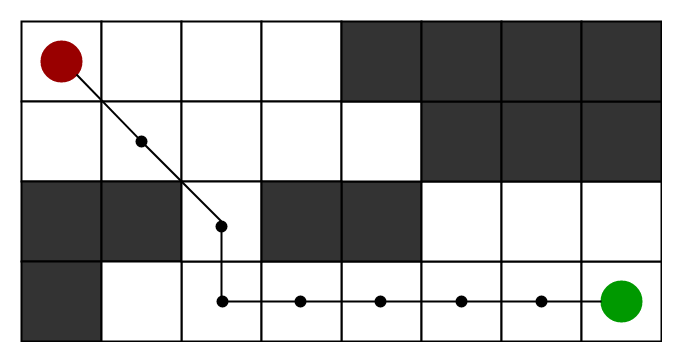

* f = g + h

* g = the movement cost to move from the starting point to a given square on the grid, following the path generated to get there.


* h = the estimated movement cost to move from that given square on the grid to the final destination. This is often referred to as the heuristic, which is nothing but a kind of smart guess. We really don’t know the actual distance until we find the path, because all sorts of things can be in the way (walls, water, etc.). There can be many ways to calculate this ‘h’ which are discussed in the later sections.






In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('random_connected_graph.csv')

# Create an empty dictionary for the adjacency list
adj_list = {}

# Iterate through the DataFrame
for row in df.itertuples(index=False):
    node1 = row.node1
    node2 = row.node2
    route_distance = row.route_distance

    # Check if node1 is already in the adjacency list
    if node1 in adj_list:
        adj_list[node1].append((node2, route_distance))
    else:
        adj_list[node1] = [(node2, route_distance)]

print(adj_list)


{'Agra': [('Sitapur', 326), ('Ghazipur', 677), ('Calicut', 2233)], 'Aligarh': [('Madhepura', 973), ('Daudnagar', 803), ('Aligarh', 0)], 'Araria': [('Bhopal', 1294), ('Belagavi', 2176), ('Delhi', 1275), ('Pakur', 236), ('Bikaner', 1666)], 'Arrah': [('Bikaner', 1356)], 'Baghpat': [('Rajsamand', 661)], 'Balaghat': [('Rajsamand', 999), ('Bikaner', 1240)], 'Belagavi': [('Araria', 2176), ('Kota', 1212)], 'Bhagalpur': [('Prayagraj', 591), ('Daudnagar', 298)], 'Bhopal': [('Araria', 1294)], 'Bikaner': [('Araria', 1666), ('Arrah', 1356), ('Balaghat', 1240), ('Una', 608), ('Nawada', 1455), ('Bikaner', 0), ('Palamu', 1457)], 'Bundi': [('Lakhimpur', 757), ('Sitamarhi', 1210), ('Palamu', 1084)], 'Calicut': [('Agra', 2233)], 'Chitrakoot': [('Jodhpur', 988)], 'Daudnagar': [('Aligarh', 803), ('Bhagalpur', 298), ('Daudnagar', 0), ('Pakur', 447)], 'Delhi': [('Araria', 1275), ('Faridabad', 46)], 'Durgapur': [('Lakhimpur', 929)], 'Faridabad': [('Delhi', 46), ('Patna', 955), ('Hanamkonda', 1430)], 'Gaya': [

In [2]:
import pandas as pd

In [3]:
start_node = input("Enter the starting or root node :")
target_node = input("Enter the goal or target node :")


# Reading the complete graph
df2 = pd.read_csv('complete_graph.csv')

# Create a DataFrame containing only the rows that match the goal_node in df2
heuristic_df = df2[df2['node2'] == target_node]

# Create a dictionary of heuristic distances
h = dict(zip(heuristic_df['node1'], heuristic_df[ 'Heuristic distance']))


In [4]:
heuristic_df

,node1,node2,route_distance,Heuristic distance
3,Agra,Patna,839,732
49,Aligarh,Patna,842,746
95,Araria,Patna,313,239
141,Arrah,Patna,52,47
187,Baghpat,Patna,1005,866
233,Balaghat,Patna,907,656
279,Belagavi,Patna,1869,1545
325,Bhagalpur,Patna,233,188
371,Bhopal,Patna,990,824
417,Bikaner,Patna,1363,1205


In [5]:
print(start_node, target_node)
print(len(heuristic_df))
column_names = heuristic_df.columns
print(column_names)

Agra Patna
45
Index(['node1', 'node2', 'route_distance', 'Heuristic distance'], dtype='object')


In [6]:
print(h)

{'Agra': 732, 'Aligarh': 746, 'Araria': 239, 'Arrah': 47, 'Baghpat': 866, 'Balaghat': 656, 'Belagavi': 1545, 'Bhagalpur': 188, 'Bhopal': 824, 'Bikaner': 1205, 'Bundi': 953, 'Calicut': 1867, 'Chitrakoot': 432, 'Daudnagar': 96, 'Delhi': 867, 'Durgapur': 318, 'Faridabad': 836, 'Gaya': 89, 'Ghazipur': 156, 'Hanamkonda': 1018, 'Jaipur': 945, 'Jehanabad': 44, 'Jodhpur': 1215, 'Kota': 933, 'Lakhimpur': 505, 'Lucknow': 440, 'Madhepura': 140, 'Mahoba': 529, 'Mirzapur': 263, 'Morena': 721, 'Nawada': 88, 'Pakur': 293, 'Palamu': 220, 'Patna': 0, 'Prayagraj': 331, 'Raebareli': 395, 'Rajsamand': 1134, 'Rohtas': 126, 'Sagar': 675, 'Sarangarh': 491, 'Sikar': 1020, 'Sitamarhi': 116, 'Sitapur': 495, 'Sri Ganganagar': 1207, 'Una': 1084}


In [7]:
# Create a dictionary to store the cost of reaching each node from the start node
g = {node: float('inf') for node in adj_list}
g[start_node] = 0

# Create a dictionary to store the estimated total cost from the start node to the goal node
f = {node: float('inf') for node in adj_list}
f[start_node] = h[start_node]  # Assuming h is the heuristic function

# Create a dictionary to store the parent of each node
parent = {node: None for node in adj_list}

open_list = [start_node]

while open_list:
    # Find the node with the lowest f value in the open list
    current_node = min(open_list, key=lambda node: f[node])
    open_list.remove(current_node)

    if current_node == target_node:
        # Reconstruct the path
        path = []
        while current_node is not None:
            path.append(current_node)
            current_node = parent[current_node]
        path.reverse()
        print(path)
        break

    for neighbor, cost in adj_list[current_node]:
        tentative_g = g[current_node] + cost
        if tentative_g < g[neighbor]:
            # This path to the neighbor is better than any previous one, update the values
            parent[neighbor] = current_node
            g[neighbor] = tentative_g
            f[neighbor] = g[neighbor] + h[neighbor]  # Assuming h is the heuristic function

            if neighbor not in open_list:
                open_list.append(neighbor)



['Agra', 'Sitapur', 'Madhepura', 'Aligarh', 'Daudnagar', 'Pakur', 'Araria', 'Delhi', 'Faridabad', 'Patna']
